In [2]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from collections import defaultdict
from scipy.sparse import csr_matrix
from CTFunctions import *

In [46]:
#checkerboard = ski.data.checkerboard()

#img = ski.data.horse()

#img = ski.transform.rescale(img, 0.1, anti_aliasing=False)

img = np.ones((10, 10), dtype=np.uint8)

# Schwarze horizontale Linie in der Mitte
img[4, :] = 0
img[5, :] = 0

# Schwarze vertikale Linie in der Mitte
img[:, 4] = 0
img[:, 5] = 0

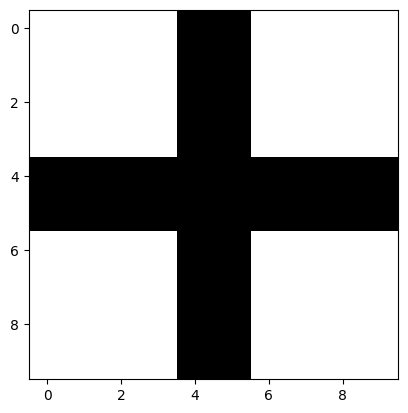

In [47]:
plt.imshow(img, cmap='gray')

In [48]:
x,y,zentrum,radius = define_circle(img)

In [49]:
lines2 = np.array(get_start_lines(img, 100))
test = rotate_lines(img, lines2, 45, zentrum)

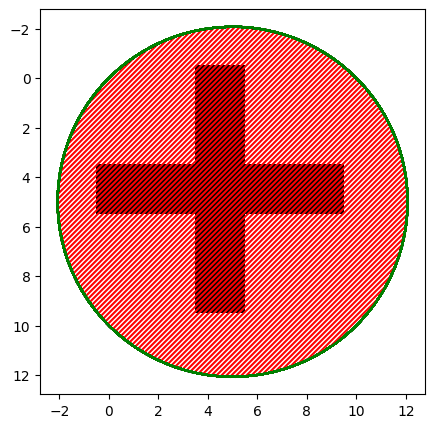

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(test)):
    ax.imshow(img, cmap='gray')
    ax.plot(test[i, :][0] , test[i, :][1], color='red')
    ax.plot(x,y, color='green')

plt.show()
#plt.savefig("Strahlen 45 grad.png")

In [51]:
img.shape

(10, 10)

In [52]:
Matrix_s, b = berechne_GS(img, 50, 50)

In [53]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.001, fit_intercept=False)
model.fit(Matrix_s, b)
x_sklearn = model.coef_

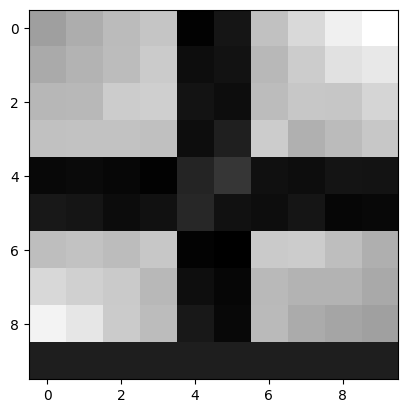

In [54]:
plt.imshow(x_sklearn.reshape(10, 10), cmap='gray')

Hat circa 3,5 Stunden gedauert und wurde mit 2000 strahlen und 50 verschiedenen Winkeln gemessen und einem $\lambda = 00000.1$